In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# engine prepares the database file to be connected to later on
engine = create_engine("sqlite:///hawaii.sqlite")
# allows us to build queries using SQLAlchemy
Base = automap_base()

In [6]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

# reflect the tables
# reflecting the table allows us to decouple the tables.
# in a way, it allows the database to have another version of itself
# to allow easier modification
Base.classes.keys()



['measurement', 'station']

In [7]:
# creating shortcuts to the 'measurement' and 'station' (columns)?
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)


# 9.2.1: Retrieve the Participation Data

In [8]:
# get the exact date 365 days since July 23 2017.
# timedelta returns the date x amount of days in YYYY MM DD format.
prev_year = dt.date(2017,7,23) - dt.timedelta(days=365)
prev_year

datetime.date(2016, 7, 23)

In [9]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)


[('2016-07-23', 0.0), ('2016-07-24', 0.13), ('2016-07-25', 4.2), ('2016-07-26', 0.0), ('2016-07-27', 0.0), ('2016-07-28', 0.0), ('2016-07-29', 0.0), ('2016-07-30', 0.0), ('2016-07-31', 0.06), ('2016-08-01', 0.08), ('2016-08-02', 0.05), ('2016-08-03', 0.0), ('2016-08-04', 0.04), ('2016-08-05', 0.01), ('2016-08-06', 0.0), ('2016-08-07', 0.39), ('2016-08-08', 0.02), ('2016-08-09', 0.0), ('2016-08-10', 0.0), ('2016-08-11', 0.0), ('2016-08-12', 0.0), ('2016-08-13', 0.0), ('2016-08-14', 0.0), ('2016-08-15', 0.0), ('2016-08-16', 0.0), ('2016-08-17', 0.0), ('2016-08-18', 0.0), ('2016-08-19', 0.04), ('2016-08-20', 0.0), ('2016-08-21', 0.12), ('2016-08-22', 0.4), ('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0

# 9.2.2 Save Query results

In [10]:
df = pd.DataFrame(results, columns=['date','percipitation'])

# remove the index and replace it with another column
df.set_index(df['date'], inplace=True)
# the .to_string(index=False) just removes the index from printing, but still has 'date' as the index
print(df.to_string(index=False))


      date  percipitation
2016-07-23           0.00
2016-07-24           0.13
2016-07-25           4.20
2016-07-26           0.00
2016-07-27           0.00
2016-07-28           0.00
2016-07-29           0.00
2016-07-30           0.00
2016-07-31           0.06
2016-08-01           0.08
2016-08-02           0.05
2016-08-03           0.00
2016-08-04           0.04
2016-08-05           0.01
2016-08-06           0.00
2016-08-07           0.39
2016-08-08           0.02
2016-08-09           0.00
2016-08-10           0.00
2016-08-11           0.00
2016-08-12           0.00
2016-08-13           0.00
2016-08-14           0.00
2016-08-15           0.00
2016-08-16           0.00
2016-08-17           0.00
2016-08-18           0.00
2016-08-19           0.04
2016-08-20           0.00
2016-08-21           0.12
2016-08-22           0.40
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
2016-08-29  

# 9.2.3 Sort the DataFrame

In [11]:
df = df.sort_index()
print(df.to_string(index=False))

      date  percipitation
2016-07-23           0.00
2016-07-23            NaN
2016-07-23           0.07
2016-07-23            NaN
2016-07-23           0.16
2016-07-24           0.13
2016-07-24           0.15
2016-07-24           0.45
2016-07-24           2.75
2016-07-24           0.18
2016-07-25           4.20
2016-07-25            NaN
2016-07-25           9.64
2016-07-25            NaN
2016-07-25           3.01
2016-07-25           5.35
2016-07-25           7.65
2016-07-26           0.00
2016-07-26           0.03
2016-07-26           0.00
2016-07-26           0.01
2016-07-26           0.00
2016-07-26           0.90
2016-07-27           0.00
2016-07-27           0.00
2016-07-27           0.04
2016-07-27            NaN
2016-07-27           0.00
2016-07-27           0.02
2016-07-27           0.06
2016-07-28           0.05
2016-07-28           0.00
2016-07-28           0.00
2016-07-28           0.00
2016-07-28           0.00
2016-07-28           0.00
2016-07-29           0.05
2016-07-29  

<AxesSubplot:xlabel='date'>

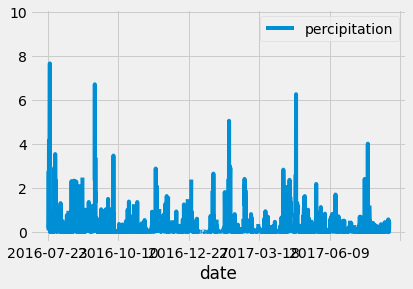

In [12]:
df.plot()

In [13]:
df.describe()

,percipitation
count,2195.000000
mean,0.196907
std,0.556862
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,9.640000


In [14]:
session.query(func.count(Station.station)).all()

[(9,)]

# 9.3.2 Determining the Most Active Stations

In [21]:
# How many times did a station report measurements?

# start the session
# use .all() method to turn it into a list of tuples
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

# 9.3.3 Find Low, High, and Average Temperatures

In [25]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
              func.avg(Measurement.tobs).filter(Measurement.station == 'USC00519281')).all()

[(53.0, 87.0, 71.66378066378067)]

# 9.3.4 Plot the Highest Number of Observations

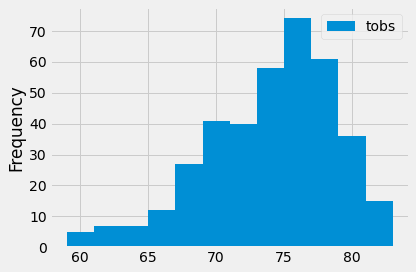

In [37]:
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
results_df = pd.DataFrame(results, columns = ['tobs'])
results_df.plot.hist(bins=12)
plt.tight_layout()

# 9.4.1 Incorporate Flask into Data Analysis

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


In [ ]:
# How many stations are available in this dataset?


In [ ]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge